In [1]:
import glob

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np

import os

import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [2]:

# datagendatagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest'
# )

In [82]:
i = 1
def sharp(imgpath):
    global i
    bgrimg = cv2.imread(imgpath)
    bgrimg = cv2.resize(bgrimg, (800, 600), interpolation=cv2.INTER_CUBIC)
    kernel_sharp = np.array(([-2, -2, -2], [-2, 17, -2], [-2, -2, -2]), dtype='int')
    sbgrimg = cv2.filter2D(bgrimg, -1, kernel_sharp)
    #stacked3d = np.hstack((bgrimg, sbgrimg))
    cv2.imwrite('sharpened_images/{}.jpg'.format(str(i)), sbgrimg)
    i += 1
#new_img = cv2.imread("C:\\Users\\Devin\\Desktop\\Savera\\Savera\\image-1.jpg")
#plt.imshow(new_img)

In [103]:
imgpath = "C:\\Users\\Devin\\Desktop\\Savera\\Savera\\"
# for item in os.listdir(imgpath):
#     sharp(imgpath + item)

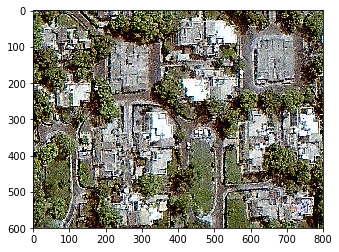

In [67]:
sample_img = "C:\\Users\\Devin\\Desktop\\SaveraAI\\sharpened_images\\1.jpg"
img=cv2.imread(sample_img)
plt.imshow(img)

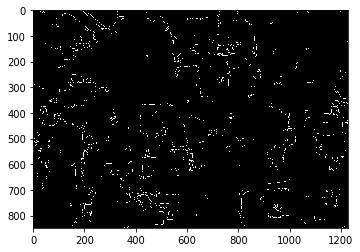

In [38]:
im = cv2.imread(imgpath+"image-1.jpg")
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
g_blur = cv2.GaussianBlur(gray, (3,3), 0)
wide = cv2.Canny(g_blur, 10, 230, apertureSize = 3)
plt.imshow(wide, cmap = plt.cm.gray)

WaterShed

In [94]:
img = cv2.imread(imgpath+"image-16.jpg")
shifted = cv2.pyrMeanShiftFiltering(img, 21, 51)
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

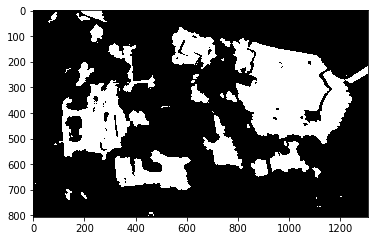

In [95]:
plt.imshow(thresh, cmap = plt.cm.gray)

In [62]:
# cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
# print("[INFO] {} unique contours found".format(len(cnts)))
# for (i, c) in enumerate(cnts):
# 	# draw the contour
# 	((x, y), _) = cv2.minEnclosingCircle(c)
# 	cv2.putText(img, "#{}".format(i + 1), (int(x) - 10, int(y)),
# 		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# 	cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
# plt.imshow(img)

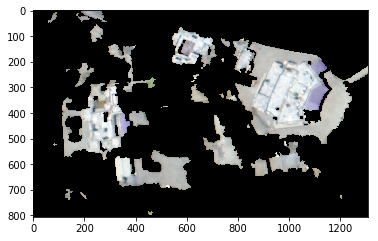

In [96]:
fg = cv2.erode(thresh,None,iterations = 2)
bgt = cv2.dilate(thresh,None,iterations = 3)
ret,bg = cv2.threshold(bgt,1,128,1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(img,marker32)
m = cv2.convertScaleAbs(marker32)
ret,thresh = cv2.threshold(m,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
res = cv2.bitwise_and(img,img,mask = thresh)
cv2.imwrite("sharpened_images/watershed_segmented_img.jpg", res)
plt.imshow(res, cmap = plt.cm.gray)

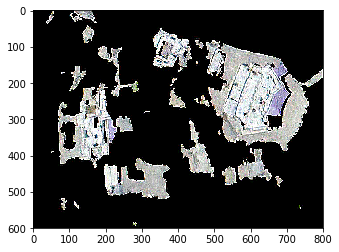

In [97]:
bgrimg = cv2.imread("C:\\Users\\Devin\\Desktop\\SaveraAI\\sharpened_images\\watershed_segmented_img.jpg")
bgrimg = cv2.resize(bgrimg, (800, 600), interpolation=cv2.INTER_CUBIC)
kernel_sharp = np.array(([-2, -2, -2], [-2, 17, -2], [-2, -2, -2]), dtype='int')
sbgrimg = cv2.filter2D(bgrimg, -1, kernel_sharp)
cv2.imwrite("sharpened_images/later_sharp.jpg", sbgrimg)
plt.imshow(sbgrimg)

In [ ]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

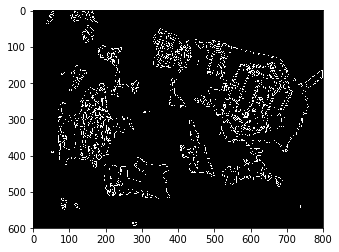

In [116]:
blurred = cv2.GaussianBlur(sbgrimg, (3, 3), 0)
cannied = cv2.Canny(blurred, 225, 250, apertureSize = 3)# auto_canny(blurred) #cv2.Canny(blurred, 225, 250, apertureSize = 3)
cv2.imwrite("sharpened_images/cannied.jpg", cannied)
plt.imshow(cannied, cmap = plt.cm.gray)